In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics

In [2]:
pd.set_option('future.no_silent_downcasting', True)
PALETTE = sns.color_palette('flare_r', as_cmap=True)

In [3]:
# Root directory for an experiment
ROOT = os.path.join(os.getcwd(), 'temperature_experiments')
# Available datasets
datasets = ['MNIST', 'FMNIST', 'CIFAR10', 'PATHMNIST', 'BLOODMNIST']
# Number of clients
no_of_clients = ['15', '30']
# Types of splits in terms of overlap
split_types = ['nonoverlaping', 'overlaping']
# Types of splits in terms of balance
split_balance = ['balanced', 'imbalanced']

In [4]:
registered_temperature = {}
# All the datasets except TISSUEMNIST
for dataset in datasets:
    for type in split_types:
        for balance in split_balance:
            for no in no_of_clients:
                path = os.path.join(ROOT, dataset, type, balance, no)
                dir_name = f"{dataset}_{type}_{balance}_{no}"
                registered_temperature[dir_name] = pd.read_csv(os.path.join(ROOT, dataset, type, balance, no, \
                    dir_name, 'results', 'clusters_temperature.csv'), names=['temperature'], index_col=0)
                             

In [5]:
FIGSIZE = (10, 12)

# Section I: Normalised results

In [6]:
registered_temperature_normalized = {}
for dataset in datasets:
    for type in split_types:
        for balance in split_balance:
            for no in no_of_clients:
                path = os.path.join(ROOT, dataset, type, balance, no)
                dir_name = f"{dataset}_{type}_{balance}_{no}"
                registered_temperature_normalized[dir_name] = pd.read_csv(os.path.join(ROOT, dataset, type, balance, no, \
                    dir_name, 'results', 'clusters_temperature.csv'), names=['temperature'], index_col=0)
                registered_temperature_normalized[dir_name] = (registered_temperature_normalized[dir_name] - registered_temperature_normalized[dir_name].min()) / (registered_temperature_normalized[dir_name].max() - registered_temperature_normalized[dir_name].min())

## Subsection I: Individual Analysis

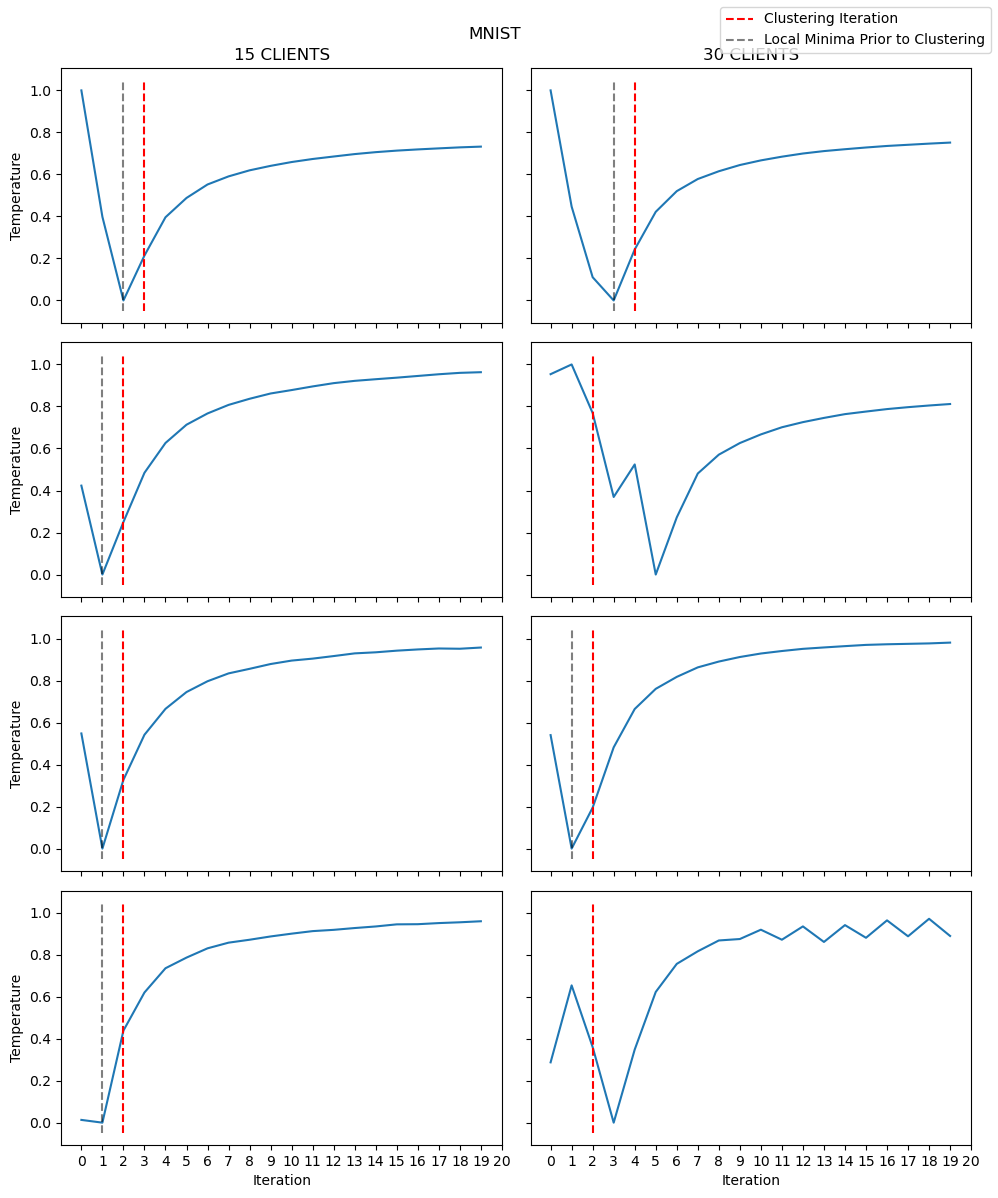

In [7]:
fig, axes = plt.subplots(4, 2, figsize=FIGSIZE, sharey=True, sharex=True)
round_cutoff = 20

axes[0][0].set_title("15 CLIENTS")
axes[0][0].plot(registered_temperature_normalized['MNIST_overlaping_balanced_15'][:round_cutoff])
axes[1][0].plot(registered_temperature_normalized['MNIST_overlaping_imbalanced_15'][:round_cutoff])
axes[2][0].plot(registered_temperature_normalized['MNIST_nonoverlaping_balanced_15']['temperature'][:round_cutoff])
axes[3][0].plot(registered_temperature_normalized['MNIST_nonoverlaping_imbalanced_15']['temperature'][:round_cutoff])

axes[0][1].set_title("30 CLIENTS")
axes[0][1].plot(registered_temperature_normalized['MNIST_overlaping_balanced_30'][:round_cutoff])
axes[1][1].plot(registered_temperature_normalized['MNIST_overlaping_imbalanced_30'][:round_cutoff])
axes[2][1].plot(registered_temperature_normalized['MNIST_nonoverlaping_balanced_30']['temperature'][:round_cutoff])
axes[3][1].plot(registered_temperature_normalized['MNIST_nonoverlaping_imbalanced_30']['temperature'][:round_cutoff])

# Plots clustering moment
ymin, ymax = plt.ylim()
axes[0][0].vlines(x=3, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed', label='Clustering Iteration')
axes[0][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5, label='Local Minima Prior to Clustering')
axes[1][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[1][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[2][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[3][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)

axes[0][1].vlines(x=4, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[0][1].vlines(x=3, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[1][1].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][1].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[3][1].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

axes[3][0].set_xlabel('Iteration')
axes[3][1].set_xlabel('Iteration')
for a in range(4):
    axes[a][0].set_ylabel('Temperature')
plt.xticks(range(0, round_cutoff+1))
fig.suptitle("MNIST")
fig.legend()
fig.tight_layout()

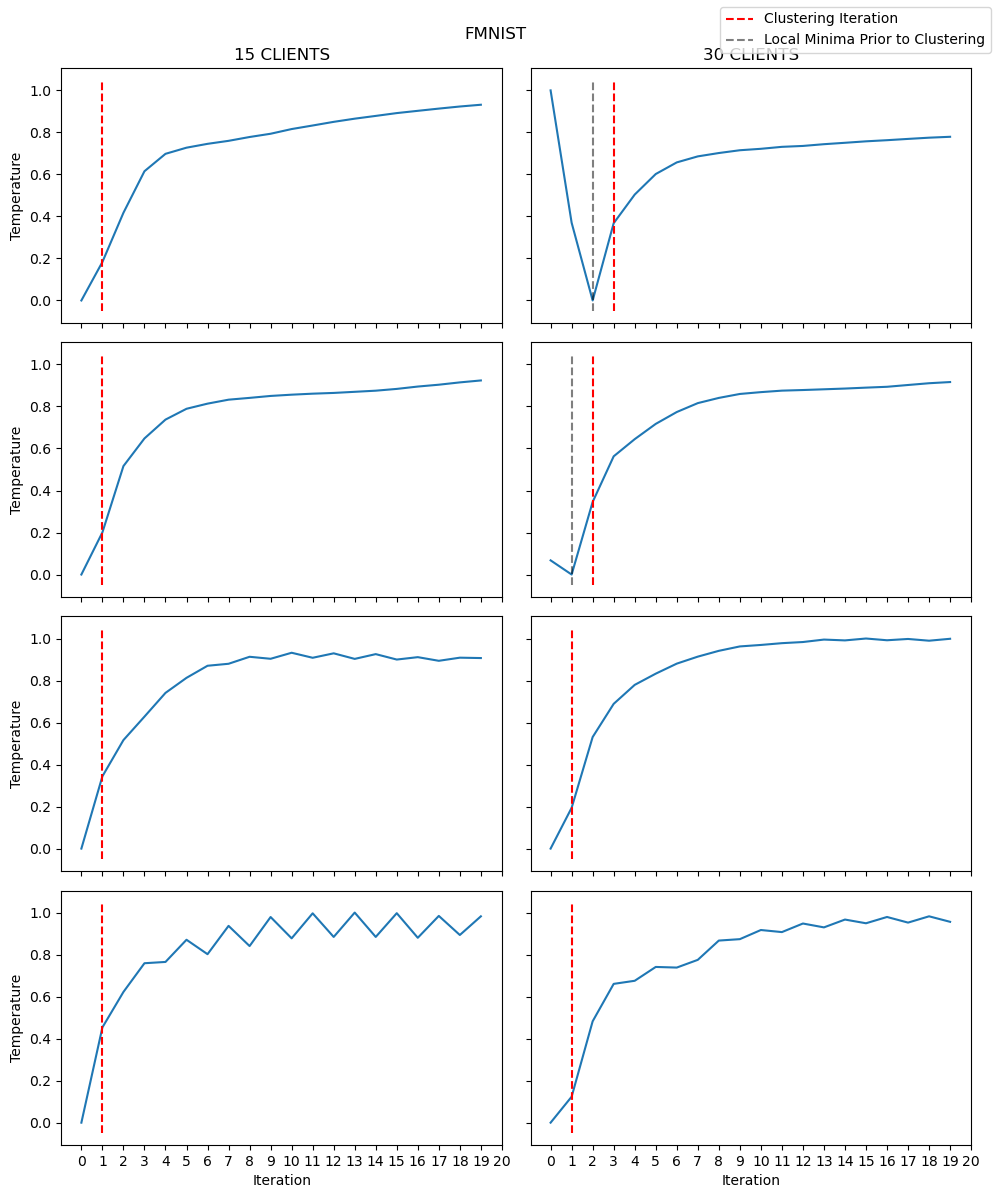

In [8]:
fig, axes = plt.subplots(4, 2, figsize=FIGSIZE, sharey=True, sharex=True)
round_cutoff = 20

axes[0][0].set_title("15 CLIENTS")
axes[0][0].plot(registered_temperature_normalized['FMNIST_overlaping_balanced_15'][:round_cutoff])
axes[1][0].plot(registered_temperature_normalized['FMNIST_overlaping_imbalanced_15'][:round_cutoff])
axes[2][0].plot(registered_temperature_normalized['FMNIST_nonoverlaping_balanced_15']['temperature'][:round_cutoff])
axes[3][0].plot(registered_temperature_normalized['FMNIST_nonoverlaping_imbalanced_15']['temperature'][:round_cutoff])

axes[0][1].set_title("30 CLIENTS")
axes[0][1].plot(registered_temperature_normalized['FMNIST_overlaping_balanced_30'][:round_cutoff])
axes[1][1].plot(registered_temperature_normalized['FMNIST_overlaping_imbalanced_30'][:round_cutoff])
axes[2][1].plot(registered_temperature_normalized['FMNIST_nonoverlaping_balanced_30']['temperature'][:round_cutoff])
axes[3][1].plot(registered_temperature_normalized['FMNIST_nonoverlaping_imbalanced_30']['temperature'][:round_cutoff])

# Plots clustering moment
ymin, ymax = plt.ylim()
axes[0][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed', label='Clustering Iteration')
axes[1][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

axes[0][1].vlines(x=3, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[0][1].vlines(x=2, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5, label='Local Minima Prior to Clustering')
axes[1][1].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[1][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[2][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

axes[3][0].set_xlabel('Iteration')
axes[3][1].set_xlabel('Iteration')
for a in range(4):
    axes[a][0].set_ylabel('Temperature')
plt.xticks(range(0, round_cutoff+1))
fig.suptitle("FMNIST")
fig.legend()
fig.tight_layout()

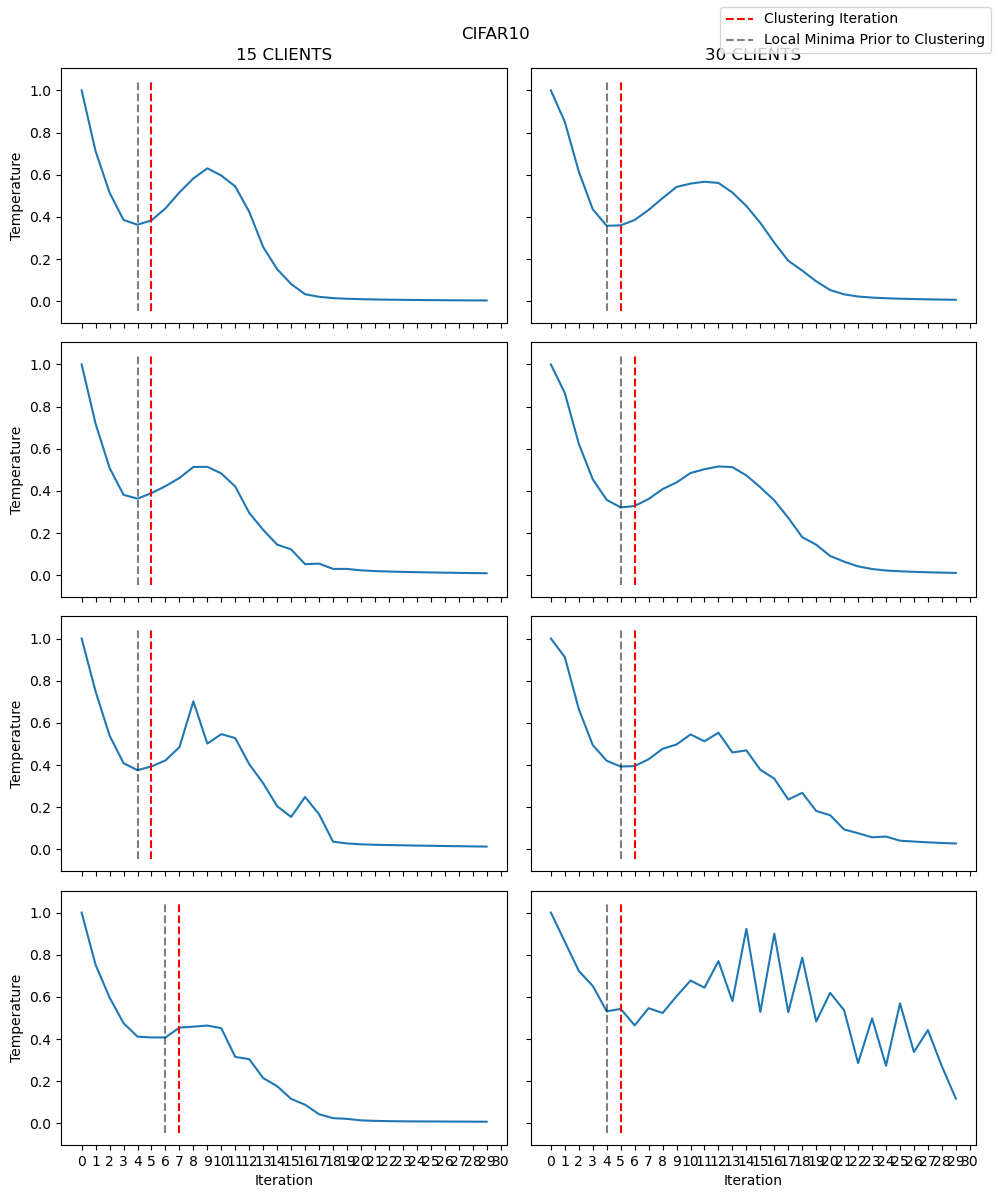

In [9]:
fig, axes = plt.subplots(4, 2, figsize=FIGSIZE, sharey=True, sharex=True)
round_cutoff = 30

axes[0][0].set_title("15 CLIENTS")
axes[0][0].plot(registered_temperature_normalized['CIFAR10_overlaping_balanced_15'][:round_cutoff])
axes[1][0].plot(registered_temperature_normalized['CIFAR10_overlaping_imbalanced_15'][:round_cutoff])
axes[2][0].plot(registered_temperature_normalized['CIFAR10_nonoverlaping_balanced_15']['temperature'][:round_cutoff])
axes[3][0].plot(registered_temperature_normalized['CIFAR10_nonoverlaping_imbalanced_15']['temperature'][:round_cutoff])

axes[0][1].set_title("30 CLIENTS")
axes[0][1].plot(registered_temperature_normalized['CIFAR10_overlaping_balanced_30'][:round_cutoff])
axes[1][1].plot(registered_temperature_normalized['CIFAR10_overlaping_imbalanced_30'][:round_cutoff])
axes[2][1].plot(registered_temperature_normalized['CIFAR10_nonoverlaping_balanced_30']['temperature'][:round_cutoff])
axes[3][1].plot(registered_temperature_normalized['CIFAR10_nonoverlaping_imbalanced_30']['temperature'][:round_cutoff])

# Plots clustering moment
ymin, ymax = plt.ylim()
axes[0][0].vlines(x=5, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed', label='Clustering Iteration')
axes[0][0].vlines(x=4, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5, label='Local Minima Prior to Clustering')
axes[1][0].vlines(x=5, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[1][0].vlines(x=4, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[2][0].vlines(x=5, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][0].vlines(x=4, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[3][0].vlines(x=7, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][0].vlines(x=6, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)

axes[0][1].vlines(x=5, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[0][1].vlines(x=4, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[1][1].vlines(x=6, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[1][1].vlines(x=5, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[2][1].vlines(x=6, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][1].vlines(x=5, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[3][1].vlines(x=5, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][1].vlines(x=4, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)

axes[3][0].set_xlabel('Iteration')
axes[3][1].set_xlabel('Iteration')
for a in range(4):
    axes[a][0].set_ylabel('Temperature')
plt.xticks(range(0, round_cutoff+1))
fig.suptitle("CIFAR10")
fig.legend()
fig.tight_layout()

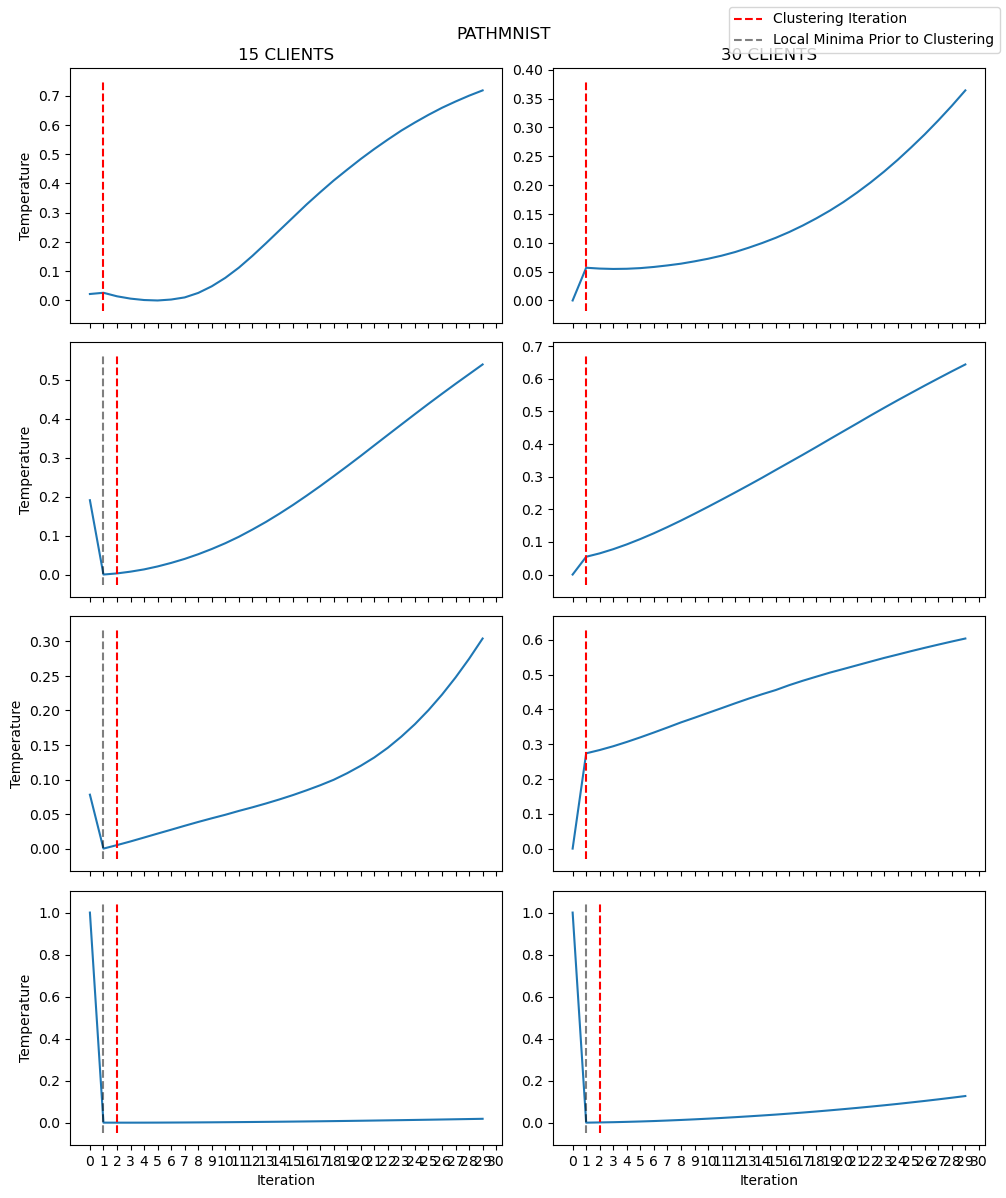

In [10]:
fig, axes = plt.subplots(4, 2, figsize=FIGSIZE, sharey=False, sharex=True)
round_cutoff = 30

axes[0][0].set_title("15 CLIENTS")
axes[0][0].plot(registered_temperature_normalized['PATHMNIST_overlaping_balanced_15'][:round_cutoff])
axes[1][0].plot(registered_temperature_normalized['PATHMNIST_overlaping_imbalanced_15'][:round_cutoff])
axes[2][0].plot(registered_temperature_normalized['PATHMNIST_nonoverlaping_balanced_15']['temperature'][:round_cutoff])
axes[3][0].plot(registered_temperature_normalized['PATHMNIST_nonoverlaping_imbalanced_15']['temperature'][:round_cutoff])

axes[0][1].set_title("30 CLIENTS")
axes[0][1].plot(registered_temperature_normalized['PATHMNIST_overlaping_balanced_30'][:round_cutoff])
axes[1][1].plot(registered_temperature_normalized['PATHMNIST_overlaping_imbalanced_30'][:round_cutoff])
axes[2][1].plot(registered_temperature_normalized['PATHMNIST_nonoverlaping_balanced_30']['temperature'][:round_cutoff])
axes[3][1].plot(registered_temperature_normalized['PATHMNIST_nonoverlaping_imbalanced_30']['temperature'][:round_cutoff])

# Plots clustering moment
ymin, ymax = axes[0][0].get_ylim()
axes[0][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed', label='Clustering Iteration')

ymin, ymax = axes[1][0].get_ylim()
axes[1][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[1][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5, label='Local Minima Prior to Clustering')

ymin, ymax = axes[2][0].get_ylim()
axes[2][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)

ymin, ymax = axes[3][0].get_ylim()
axes[3][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)

ymin, ymax = axes[0][1].get_ylim()
axes[0][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

ymin, ymax = axes[1][1].get_ylim()
axes[1][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

ymin, ymax = axes[2][1].get_ylim()
axes[2][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

ymin, ymax = axes[3][1].get_ylim()
axes[3][1].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)

axes[3][0].set_xlabel('Iteration')
axes[3][1].set_xlabel('Iteration')
for a in range(4):
    axes[a][0].set_ylabel('Temperature')
plt.xticks(range(0, round_cutoff+1))
fig.suptitle("PATHMNIST")
fig.legend()
fig.tight_layout()

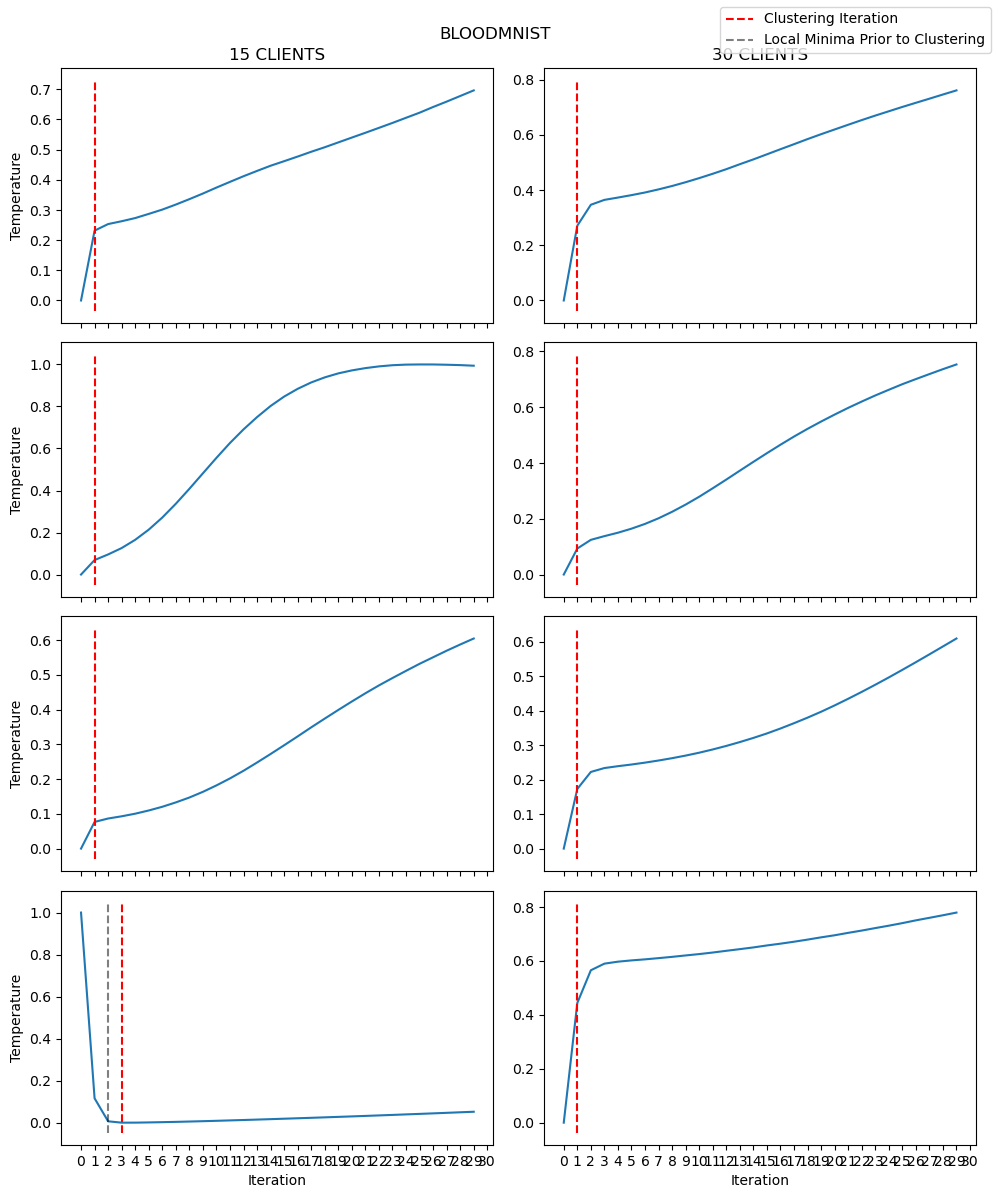

In [11]:
fig, axes = plt.subplots(4, 2, figsize=FIGSIZE, sharey=False, sharex=True)
round_cutoff = 30

axes[0][0].set_title("15 CLIENTS")
axes[0][0].plot(registered_temperature_normalized['BLOODMNIST_overlaping_balanced_15'][:round_cutoff])
axes[1][0].plot(registered_temperature_normalized['BLOODMNIST_overlaping_imbalanced_15'][:round_cutoff])
axes[2][0].plot(registered_temperature_normalized['BLOODMNIST_nonoverlaping_balanced_15']['temperature'][:round_cutoff])
axes[3][0].plot(registered_temperature_normalized['BLOODMNIST_nonoverlaping_imbalanced_15']['temperature'][:round_cutoff])

axes[0][1].set_title("30 CLIENTS")
axes[0][1].plot(registered_temperature_normalized['BLOODMNIST_overlaping_balanced_30'][:round_cutoff])
axes[1][1].plot(registered_temperature_normalized['BLOODMNIST_overlaping_imbalanced_30'][:round_cutoff])
axes[2][1].plot(registered_temperature_normalized['BLOODMNIST_nonoverlaping_balanced_30']['temperature'][:round_cutoff])
axes[3][1].plot(registered_temperature_normalized['BLOODMNIST_nonoverlaping_imbalanced_30']['temperature'][:round_cutoff])

# Plots clustering moment
ymin, ymax = axes[0][0].get_ylim()
axes[0][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed', label='Clustering Iteration')

ymin, ymax = axes[1][0].get_ylim()
axes[1][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

ymin, ymax = axes[2][0].get_ylim()
axes[2][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

ymin, ymax = axes[3][0].get_ylim()
axes[3][0].vlines(x=3, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5, label='Local Minima Prior to Clustering')

ymin, ymax = axes[0][1].get_ylim()
axes[0][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

ymin, ymax = axes[1][1].get_ylim()
axes[1][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

ymin, ymax = axes[2][1].get_ylim()
axes[2][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

ymin, ymax = axes[3][1].get_ylim()
axes[3][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

axes[3][0].set_xlabel('Iteration')
axes[3][1].set_xlabel('Iteration')
for a in range(4):
    axes[a][0].set_ylabel('Temperature')
plt.xticks(range(0, round_cutoff+1))
fig.suptitle("BLOODMNIST")
fig.legend()
fig.tight_layout()

## Subsection II: Average over splits (one graph per dataset).

In [12]:
# Stacking frames
frames = [registered_temperature_normalized['MNIST_overlaping_balanced_15'], 
          registered_temperature_normalized['MNIST_overlaping_imbalanced_15'], 
          registered_temperature_normalized['MNIST_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature_normalized['MNIST_nonoverlaping_imbalanced_15']['temperature']]
mnist_15_stacked = pd.concat(frames, axis=1)

frames = [registered_temperature_normalized['MNIST_overlaping_balanced_30'], 
          registered_temperature_normalized['MNIST_overlaping_imbalanced_30'], 
          registered_temperature_normalized['MNIST_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature_normalized['MNIST_nonoverlaping_imbalanced_30']['temperature']]
mnist_30_stacked = pd.concat(frames, axis=1)

frames = [registered_temperature_normalized['FMNIST_overlaping_balanced_15'], 
          registered_temperature_normalized['FMNIST_overlaping_imbalanced_15'], 
          registered_temperature_normalized['FMNIST_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature_normalized['FMNIST_nonoverlaping_imbalanced_15']['temperature']]
fmnist_15_stacked = pd.concat(frames, axis=1)

frames = [registered_temperature_normalized['FMNIST_overlaping_balanced_30'], 
          registered_temperature_normalized['FMNIST_overlaping_imbalanced_30'], 
          registered_temperature_normalized['FMNIST_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature_normalized['FMNIST_nonoverlaping_imbalanced_30']['temperature']]
fmnist_30_stacked = pd.concat(frames, axis=1)

frames = [registered_temperature_normalized['CIFAR10_overlaping_balanced_15'], 
          registered_temperature_normalized['CIFAR10_overlaping_imbalanced_15'], 
          registered_temperature_normalized['CIFAR10_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature_normalized['CIFAR10_nonoverlaping_imbalanced_15']['temperature']]
cifar10_15_stacked = pd.concat(frames, axis=1)

frames = [registered_temperature_normalized['CIFAR10_overlaping_balanced_30'], 
          registered_temperature_normalized['CIFAR10_overlaping_imbalanced_30'], 
          registered_temperature_normalized['CIFAR10_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature_normalized['CIFAR10_nonoverlaping_imbalanced_30']['temperature']]
cifar10_30_stacked = pd.concat(frames, axis=1)

frames = [registered_temperature_normalized['PATHMNIST_overlaping_balanced_15'], 
          registered_temperature_normalized['PATHMNIST_overlaping_imbalanced_15'], 
          registered_temperature_normalized['PATHMNIST_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature_normalized['PATHMNIST_nonoverlaping_imbalanced_15']['temperature']]
pathmnist_15_stacked = pd.concat(frames, axis=1)

frames = [registered_temperature_normalized['PATHMNIST_overlaping_balanced_30'], 
          registered_temperature_normalized['PATHMNIST_overlaping_imbalanced_30'], 
          registered_temperature_normalized['PATHMNIST_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature_normalized['PATHMNIST_nonoverlaping_imbalanced_30']['temperature']]
pathmnist_30_stacked = pd.concat(frames, axis=1)

frames = [registered_temperature_normalized['BLOODMNIST_nonoverlaping_balanced_15'], 
          registered_temperature_normalized['BLOODMNIST_overlaping_imbalanced_15'], 
          registered_temperature_normalized['BLOODMNIST_overlaping_balanced_15']['temperature'], 
          registered_temperature_normalized['BLOODMNIST_overlaping_imbalanced_15']['temperature']]
bloodmnist_15_stacked = pd.concat(frames, axis=1)

frames = [registered_temperature_normalized['BLOODMNIST_nonoverlaping_balanced_30'], 
          registered_temperature_normalized['BLOODMNIST_overlaping_imbalanced_30'], 
          registered_temperature_normalized['BLOODMNIST_overlaping_balanced_30']['temperature'], 
          registered_temperature_normalized['BLOODMNIST_overlaping_imbalanced_30']['temperature']]
bloodmnist_30_stacked = pd.concat(frames, axis=1)

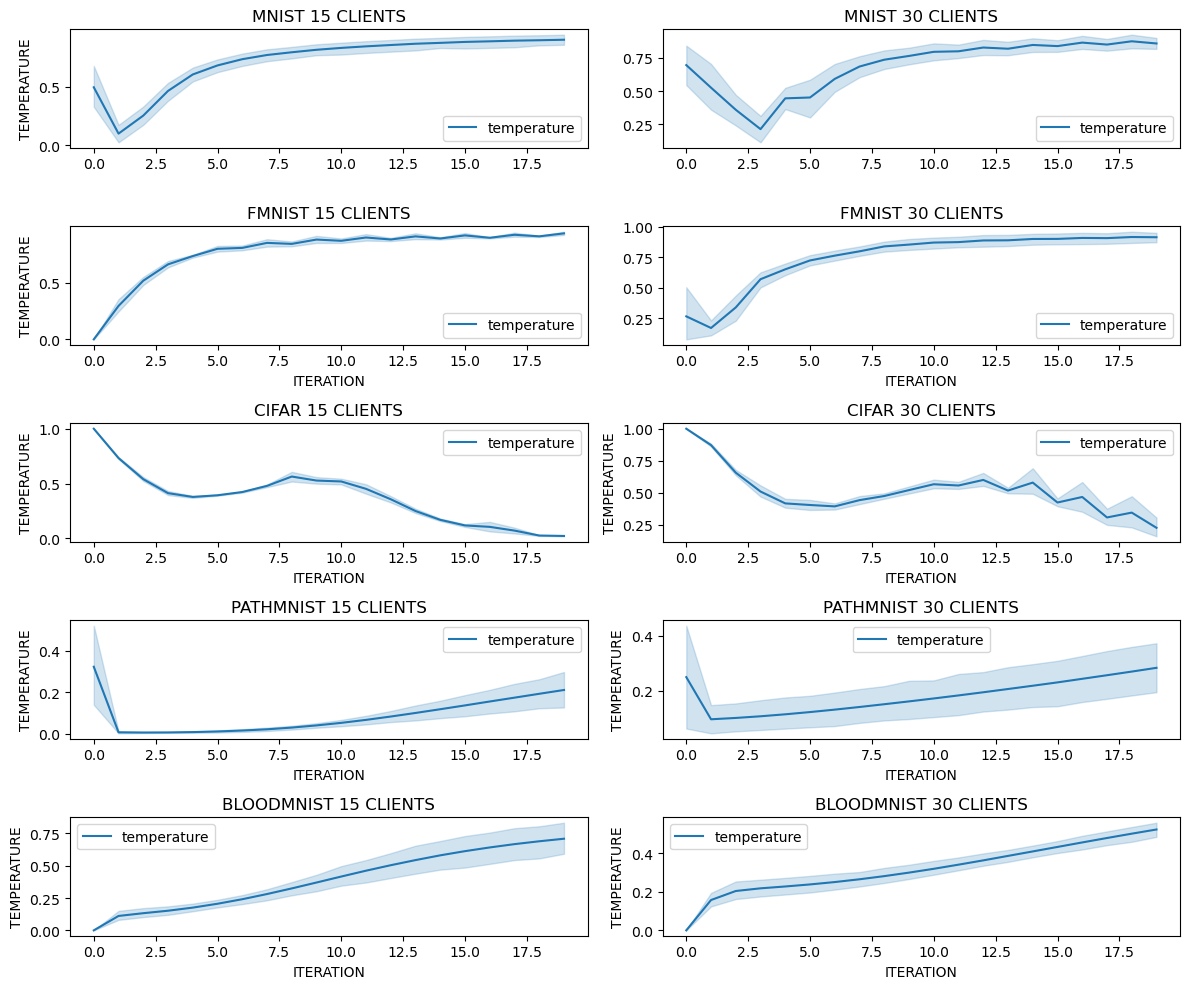

In [13]:
fig, axes = plt.subplots(5, 2, figsize=(12, 10))

# Mnist 15 stakced
sns.lineplot(mnist_15_stacked[:20], ax=axes[0][0])
axes[0][0].set_title('MNIST 15 CLIENTS')
axes[0][0].set_ylabel("TEMPERATURE")

# MNIST 30 stakced
sns.lineplot(mnist_30_stacked[:20], ax=axes[0][1])
axes[0][1].set_title("MNIST 30 CLIENTS")

# FMNIST 15 stacked
sns.lineplot(fmnist_15_stacked[:20], ax=axes[1][0])
axes[1][0].set_title("FMNIST 15 CLIENTS")
axes[1][0].set_ylabel("TEMPERATURE")
axes[1][0].set_xlabel("ITERATION")

# FNIST 30 stacked
sns.lineplot(fmnist_30_stacked[:20], ax=axes[1][1])
axes[1][1].set_title("FMNIST 30 CLIENTS")
axes[1][1].set_xlabel("ITERATION")

# CIFAR 15 stacked
sns.lineplot(cifar10_15_stacked[:20], ax=axes[2][0])
axes[2][0].set_title("CIFAR 15 CLIENTS")
axes[2][0].set_ylabel("TEMPERATURE")
axes[2][0].set_xlabel("ITERATION")

# CIFAR 30 stacked
sns.lineplot(cifar10_30_stacked[:20], ax=axes[2][1])
axes[2][1].set_title("CIFAR 30 CLIENTS")
axes[2][1].set_ylabel("TEMPERATURE")
axes[2][1].set_xlabel("ITERATION")

# PATHMNIST 15 stacked
sns.lineplot(pathmnist_15_stacked[:20], ax=axes[3][0])
axes[3][0].set_title("PATHMNIST 15 CLIENTS")
axes[3][0].set_ylabel("TEMPERATURE")
axes[3][0].set_xlabel("ITERATION")

# PATHMNIST 30 stacked
sns.lineplot(pathmnist_30_stacked[:20], ax=axes[3][1])
axes[3][1].set_title("PATHMNIST 30 CLIENTS")
axes[3][1].set_ylabel("TEMPERATURE")
axes[3][1].set_xlabel("ITERATION")

# BLOODMNIST 15 stacked
sns.lineplot(bloodmnist_15_stacked[:20], ax=axes[4][0])
axes[4][0].set_title("BLOODMNIST 15 CLIENTS")
axes[4][0].set_ylabel("TEMPERATURE")
axes[4][0].set_xlabel("ITERATION")

# BLOODMNIST 30 stacked
sns.lineplot(bloodmnist_30_stacked[:20], ax=axes[4][1])
axes[4][1].set_title("BLOODMNIST 30 CLIENTS")
axes[4][1].set_ylabel("TEMPERATURE")
axes[4][1].set_xlabel("ITERATION")

plt.tight_layout()

## Subsection III: Average over splits (one graph per number of clients).

In [14]:
# Stacking frames
frames = [registered_temperature_normalized['MNIST_overlaping_balanced_15'], 
          registered_temperature_normalized['MNIST_overlaping_imbalanced_15'], 
          registered_temperature_normalized['MNIST_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature_normalized['MNIST_nonoverlaping_imbalanced_15']['temperature'],
          registered_temperature_normalized['FMNIST_overlaping_balanced_15'], 
          registered_temperature_normalized['FMNIST_overlaping_imbalanced_15'], 
          registered_temperature_normalized['FMNIST_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature_normalized['FMNIST_nonoverlaping_imbalanced_15']['temperature'],
          registered_temperature_normalized['CIFAR10_overlaping_balanced_15'], 
          registered_temperature_normalized['CIFAR10_overlaping_imbalanced_15'], 
          registered_temperature_normalized['CIFAR10_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature_normalized['CIFAR10_nonoverlaping_imbalanced_15']['temperature'],
          registered_temperature_normalized['PATHMNIST_overlaping_balanced_15'], 
          registered_temperature_normalized['PATHMNIST_overlaping_imbalanced_15'], 
          registered_temperature_normalized['PATHMNIST_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature_normalized['PATHMNIST_nonoverlaping_imbalanced_15']['temperature'],
          registered_temperature_normalized['BLOODMNIST_overlaping_balanced_15'], 
          registered_temperature_normalized['BLOODMNIST_overlaping_imbalanced_15'], 
          registered_temperature_normalized['BLOODMNIST_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature_normalized['BLOODMNIST_nonoverlaping_imbalanced_15']['temperature']]
temperature_15_stacked = pd.concat(frames, axis=1)

frames = [registered_temperature_normalized['MNIST_overlaping_balanced_30'], 
          registered_temperature_normalized['MNIST_overlaping_imbalanced_30'], 
          registered_temperature_normalized['MNIST_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature_normalized['MNIST_nonoverlaping_imbalanced_30']['temperature'],
          registered_temperature_normalized['FMNIST_overlaping_balanced_30'], 
          registered_temperature_normalized['FMNIST_overlaping_imbalanced_30'], 
          registered_temperature_normalized['FMNIST_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature_normalized['FMNIST_nonoverlaping_imbalanced_30']['temperature'],
          registered_temperature_normalized['CIFAR10_overlaping_balanced_30'], 
          registered_temperature_normalized['CIFAR10_overlaping_imbalanced_30'], 
          registered_temperature_normalized['CIFAR10_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature_normalized['CIFAR10_nonoverlaping_imbalanced_30']['temperature'],
          registered_temperature_normalized['PATHMNIST_overlaping_balanced_30'], 
          registered_temperature_normalized['PATHMNIST_overlaping_imbalanced_30'], 
          registered_temperature_normalized['PATHMNIST_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature_normalized['PATHMNIST_nonoverlaping_imbalanced_30']['temperature'],
          registered_temperature_normalized['BLOODMNIST_overlaping_balanced_30'], 
          registered_temperature_normalized['BLOODMNIST_overlaping_imbalanced_30'], 
          registered_temperature_normalized['BLOODMNIST_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature_normalized['BLOODMNIST_nonoverlaping_imbalanced_30']['temperature']]
temperature_30_stacked = pd.concat(frames, axis=1)

<Axes: >

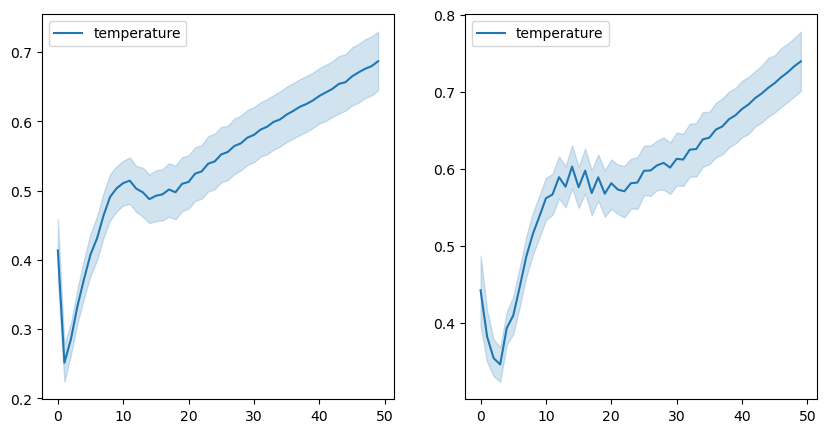

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.lineplot(temperature_15_stacked, ax=axes[0], n_boot=5000, err_style='band')
sns.lineplot(temperature_30_stacked, ax=axes[1], n_boot=5000, err_style='band')

<Axes: >

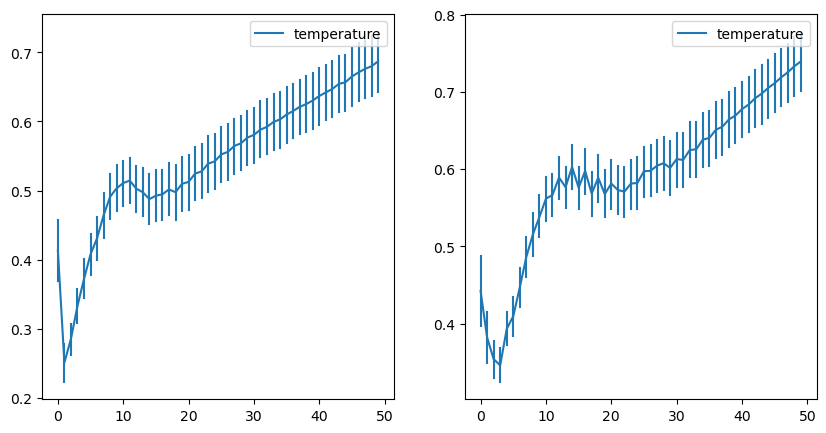

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.lineplot(temperature_15_stacked, ax=axes[0], n_boot=5000, err_style='bars')
sns.lineplot(temperature_30_stacked, ax=axes[1], n_boot=5000, err_style='bars')

<!-- ## Stage 3: Distinction Between FullSized ResNet and Adjusted ResNet -->